<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [154]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-09-19 05:21:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  7.34MB/s    in 4.6s    

2021-09-19 05:21:43 (7.66 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

Connect to the database.


In [156]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [157]:
import pandas as pd

## Demo: How to run an sql query


In [93]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [94]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [135]:
QUERY = """
SELECT COUNT(*) as Count, DevType
FROM DevType
GROUP BY DevType
ORDER BY Count DESC



"""

pd.read_sql_query(QUERY, conn)

,Count,DevType
0,6928,"Developer, full-stack"
1,6290,"Developer, back-end"
2,3920,"Developer, front-end"
3,2575,"Developer, desktop or enterprise applications"
4,1959,"Developer, mobile"
5,1639,DevOps specialist
6,1413,Database administrator
7,1202,System administrator
8,988,Designer
9,911,"Developer, QA or test"


## Demo: How to run a group by query


In [95]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [96]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


       index  Respondent                      MainBranch Hobbyist  \
0          0           4  I am a developer by profession       No   
1          1           9  I am a developer by profession      Yes   
2          2          13  I am a developer by profession      Yes   
3          3          16  I am a developer by profession      Yes   
4          4          17  I am a developer by profession      Yes   
...      ...         ...                             ...      ...   
11393  11393       25136  I am a developer by profession      Yes   
11394  11394       25137  I am a developer by profession      Yes   
11395  11395       25138  I am a developer by profession      Yes   
11396  11396       25141  I am a developer by profession      Yes   
11397  11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more 

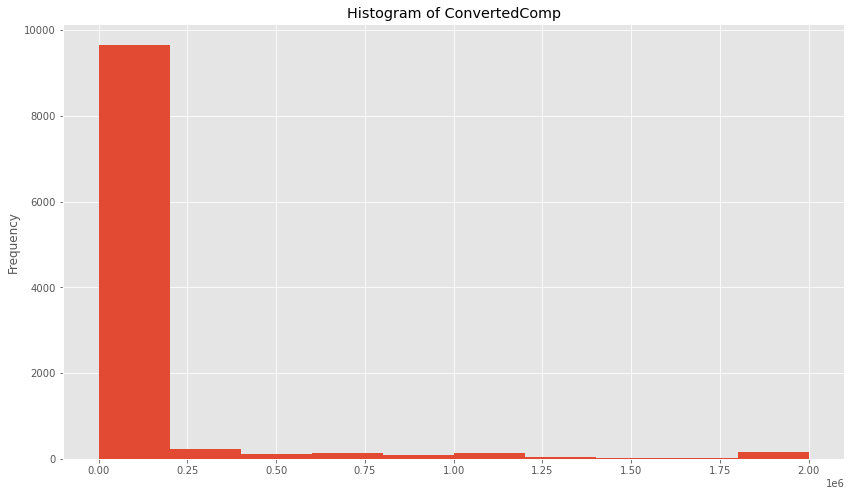

In [132]:
# your code goes here

QUERY = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
print(df)

df['ConvertedComp'].plot(kind = 'hist', figsize = (14,8))
plt.title('Histogram of ConvertedComp')
plt.show()



### Box Plots


Plot a box plot of `Age.`


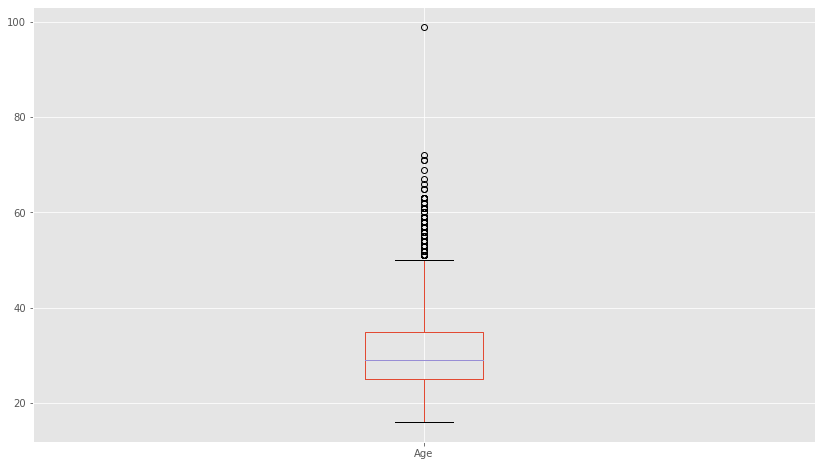

In [98]:
# your code goes here

df['Age'].plot(kind = 'box', figsize = (14,8))
plt.show()



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


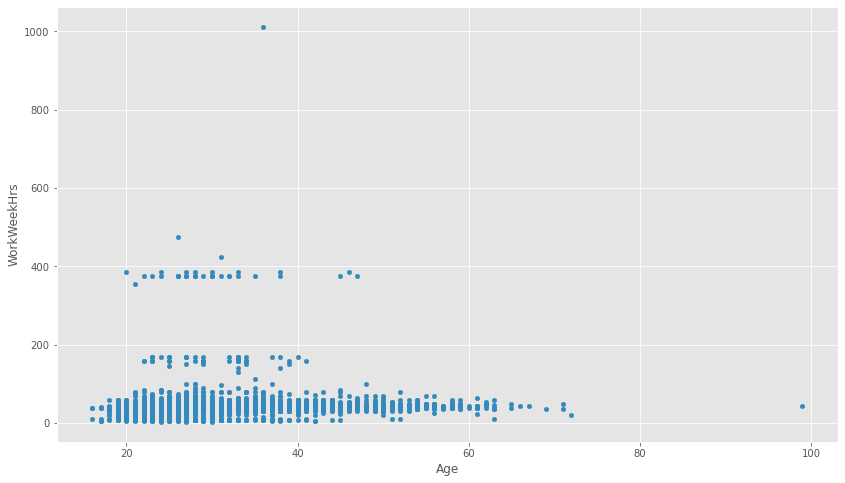

In [99]:
# your code goes here

df2 = df[['Age','WorkWeekHrs']]
df2.plot(kind = 'scatter', x = 'Age', y = 'WorkWeekHrs', figsize = (14,8))

plt.show()



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


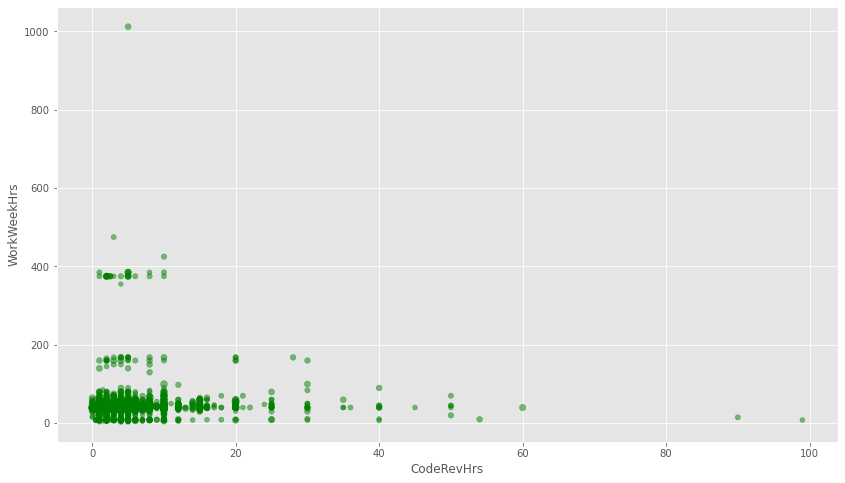

In [100]:
# your code goes here

df.plot(kind='scatter',
                    x='CodeRevHrs',
                    y='WorkWeekHrs',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s="Age",  # pass in weights 
                   )

plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


                        Respondent  Count
DatabaseDesireNextYear                   
PostgreSQL                       9   4328
MongoDB                         16   3649
Redis                            9   3331
MySQL                            4   3281
Elasticsearch                   16   2856


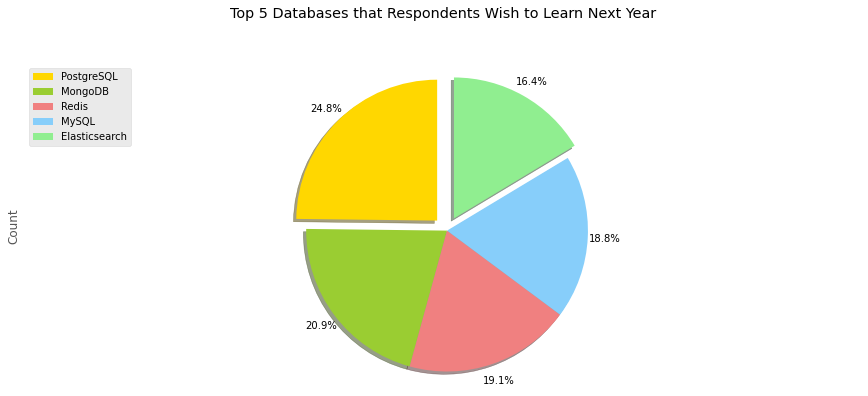

In [101]:
# your code goes here
QUERY = """
SELECT Respondent, DatabaseDesireNextYear, Count(DatabaseDesireNextYear) as Count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by Count desc
"""

df2 = pd.read_sql_query(QUERY,conn)
top_5 = df2.head()
top_5.set_index('DatabaseDesireNextYear', inplace=True)
print (top_5)

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0, 0, 0, 0.1] # ratio for each continent with which to offset each wedge.

top_5['Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Top 5 Databases that Respondents Wish to Learn Next Year', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=top_5.index, loc='upper left') 

plt.show()





In [102]:
QUERY = """
SELECT Respondent, LanguageDesireNextYear, Count(LanguageDesireNextYear) as Count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by Count desc
"""

df5 = pd.read_sql_query(QUERY,conn)
df5
#top_5_df5 = df2.head()
#top_5_df5.set_index('DatabaseDesireNextYear', inplace=True)
#print (top_5)

,Respondent,LanguageDesireNextYear,Count
0,4,JavaScript,6630
1,9,HTML/CSS,5328
2,20,Python,5239
3,4,SQL,5012
4,9,TypeScript,4088
5,4,C#,3591
6,9,Bash/Shell/PowerShell,3097
7,17,Java,2953
8,23,Go,2759
9,23,Kotlin,1890


In [131]:
QUERY = """
SELECT COUNT(DatabaseWorkedWith) AS Count, Respondent
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING Count = 1 AND DatabaseWorkedWith = 'MySQL'



"""

df6 = pd.read_sql_query(QUERY,conn)
df6

,Count,Respondent
0,1,25
1,1,129
2,1,147
3,1,148
4,1,194
...,...,...
469,1,25007
470,1,25012
471,1,25091
472,1,25111


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [105]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age >= 30 AND Age <= 35
"""

df3 = pd.read_sql_query(QUERY,conn)

print(df3)

df3.groupby(by='Age').median()





       Age  WorkWeekHrs  CodeRevHrs
0     31.0          8.0         3.0
1     34.0         40.0         2.0
2     32.0         40.0         2.0
3     34.0         42.0        15.0
4     33.0         40.0         2.0
...    ...          ...         ...
2937  32.0         42.0         4.0
2938  32.0         50.0         2.0
2939  32.0         56.0        14.0
2940  34.0         40.0         5.0
2941  30.0         80.0         1.0

[2942 rows x 3 columns]


,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


       Age  ConvertedComp
0     28.0        90000.0
1     26.0       455352.0
2     29.0        65277.0
3     27.0        20623.0
4     27.0       107000.0
...    ...            ...
4312  26.0        35518.0
4313  26.0        26586.0
4314  25.0        19880.0
4315  25.0        80371.0
4316  30.0            NaN

[4317 rows x 2 columns]


<AxesSubplot:xlabel='Age', ylabel='ConvertedComp'>

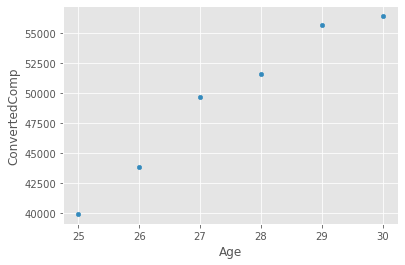

In [144]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 25 AND Age <= 30
"""

df4 = pd.read_sql_query(QUERY,conn)

print(df4)

df4 = df4.groupby(by='Age').median()

df4.reset_index(inplace=True)

df4.plot(kind='scatter',x='Age',y='ConvertedComp')




### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [149]:
# your code goes here
df['MainBranch'].value_counts()



I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

In [153]:
QUERY = """
SELECT Count(Respondent) AS Count, LanguageWorkedWith
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY Count DESC
LIMIT 10

"""

df7 = pd.read_sql_query(QUERY,conn)
df7

,Count,LanguageWorkedWith
0,8687,JavaScript
1,7830,HTML/CSS
2,7106,SQL
3,4642,Bash/Shell/PowerShell
4,4542,Python
5,4506,Java
6,4288,C#
7,3232,TypeScript
8,2913,PHP
9,1946,C++


   Count MiscTechDesireNextYear
9   1056           Apache Spark
8   1091                Flutter
7   1168                Ansible
6   1250                 Pandas
5   1440               Unity 3D
4   2324           React Native
3   2541                   .NET
2   2592             TensorFlow
1   3113              .NET Core
0   4995                Node.js


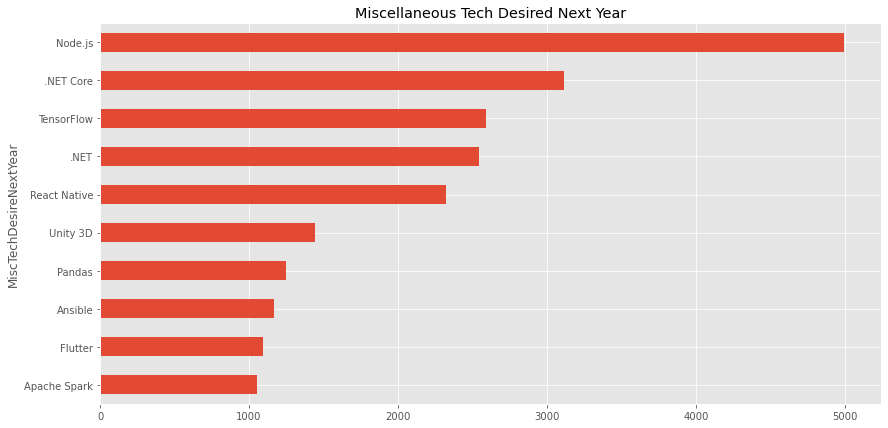

In [175]:
QUERY = """
SELECT Count(Respondent) AS Count, MiscTechDesireNextYear
FROM MiscTechDesireNextYear
GROUP BY MiscTechDesireNextYear
ORDER BY Count DESC
"""
df = pd.read_sql_query(QUERY,conn)
df = df.head(10)
df.sort_values('Count',ascending=True, inplace=True)
print(df)

ax = df.plot(kind='barh', x='MiscTechDesireNextYear', figsize = (14,7))
ax.set_title('Miscellaneous Tech Desired Next Year')
ax.get_legend().remove()
plt.show()





Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
